# Word Embeddings with word2vec, GloVe, fastText

# TODO

- [ ] Curse and blessing of high dimensions
- [ ] Comments (and maybe exercise) on t-SNE and UMAP dimensionality reduction


In this session you will load, train and evaluate word embeddings.

In [3]:
%matplotlib inline

import os
import urllib.request
import gensim
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

#### Q: Name two advantages of using dense parametrised word representations compared to one-hot vectors

#### A: Give your answer here

1) We can define a similarity measure between different words, for example using the cosine of the scalar product (which would be zero for the one-hot encoding since all vectors are orthogonal)

2) Can try to embedd in lower-dimensional space (do not need a separate dimension for each word) 

## Play around with pre-trained Word2Vec

In [16]:
#convenience function for plotting embeddings into 2-dimensional space

def plot_word_embeddings(model, search_list):
    words = []
    for term in search_list:
        words += [w[0] for w in model.wv.most_similar([term], topn=6)]                                   
    words += search_list    

    vectors = model.wv[words]

    tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=7)
    T = tsne.fit_transform(vectors)

    plt.figure(figsize=(16, 10))
    plt.scatter(T[:, 0], T[:, 1])
    for label, x, y in zip(words, T[:, 0], T[:, 1]):
        plt.annotate(label, xy=(x+2, y+2), xytext=(0, 0), textcoords='offset points')

Word2Vec was one of the first models that learned a dense word-vector representation. Let us start with a pretrained Word2Vec model.

#### Q: What was the intuition about the Word2Vec training?

#### A: Give your answer here

In [6]:
import gensim.downloader as api

corpus = api.load('text8')
api.info("text8")

{'num_records': 1701,
 'record_format': 'list of str (tokens)',
 'file_size': 33182058,
 'reader_code': 'https://github.com/RaRe-Technologies/gensim-data/releases/download/text8/__init__.py',
 'license': 'not found',
 'description': 'First 100,000,000 bytes of plain text from Wikipedia. Used for testing purposes; see wiki-english-* for proper full Wikipedia datasets.',
 'checksum': '68799af40b6bda07dfa47a32612e5364',
 'file_name': 'text8.gz',
 'read_more': ['http://mattmahoney.net/dc/textdata.html'],
 'parts': 1}

In [7]:
from gensim.models.word2vec import Word2Vec

print("Training model on corpus ...")

# Documentation:
# https://radimrehurek.com/gensim/models/word2vec.html
# sg ({0, 1}, optional) – Training algorithm: 1 for skip-gram; otherwise CBOW.
w2v_pretrained = Word2Vec(corpus, vector_size=100, window=5, min_count=1, workers=4)

print("Finished training.")

Training model on corpus ...
Finished loading.


In [8]:
# Check the number of embedded words and their embedding size
w2v_pretrained.wv.vectors.shape

(253854, 100)

In [9]:
# Get the vector to a word
queen_vec = w2v_pretrained.wv['queen']
print(queen_vec)
print('queen_vec.shape is', queen_vec.shape)

[-2.341566   -1.267332    2.8422706  -0.7006088   2.6348045   0.615732
  1.5938799   0.72488445 -0.41409376 -0.08635896 -1.4860239  -1.8681968
  2.1305294   3.9442625  -1.1142751  -0.57523155  2.7716174  -0.5036931
 -1.2881318  -0.87163734 -1.9760863   1.1221282  -2.332217   -0.2807845
  0.05373147  0.40339634  1.960882    2.1926508  -0.7141405  -0.22735867
  1.2634854   1.2856735  -0.9737175  -0.18752496  0.8168829  -0.09104796
  0.7419584  -3.024466   -1.2354268   1.6842039   0.5917482   2.48817
 -1.2038833   0.46097016 -0.87424827 -1.9758395   1.2164056  -1.758226
 -0.6907456  -0.5320891   1.3269283  -1.153914   -1.1881843   2.3002672
  2.3511453  -1.938281    2.4037251   0.17149289  1.002642   -3.4736185
  0.20472074 -1.9421383   0.12838069 -0.52580184 -0.5712759  -0.72664577
 -2.6214273   1.4865482  -1.3360767  -1.7176418   0.6089617  -0.3182952
 -0.13828358 -0.92847276 -0.6877755   0.01513193  1.1982445   2.2325304
 -0.7209559   2.6891801  -2.130361    0.78539133  1.3227831   1.4

We can use the cosine-smililarity metric to compare different embeddings. 

In [10]:
w2v_pretrained.wv.similarity('queen', 'king')

0.7294959

or even find the most similar words to a given word

In [11]:
w2v_pretrained.wv.most_similar('queen')

[('elizabeth', 0.7684056758880615),
 ('prince', 0.7500661611557007),
 ('princess', 0.7452202439308167),
 ('king', 0.7294957637786865),
 ('crown', 0.6789796948432922),
 ('mary', 0.6786444187164307),
 ('regent', 0.6602312922477722),
 ('lord', 0.6598228216171265),
 ('victoria', 0.6520000100135803),
 ('consort', 0.6514495611190796)]

/opt/homebrew/Caskroom/miniforge/base/envs/2022-02-10_rosetta_py3.8_new/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/homebrew/Caskroom/miniforge/base/envs/2022-02-10_rosetta_py3.8_new/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


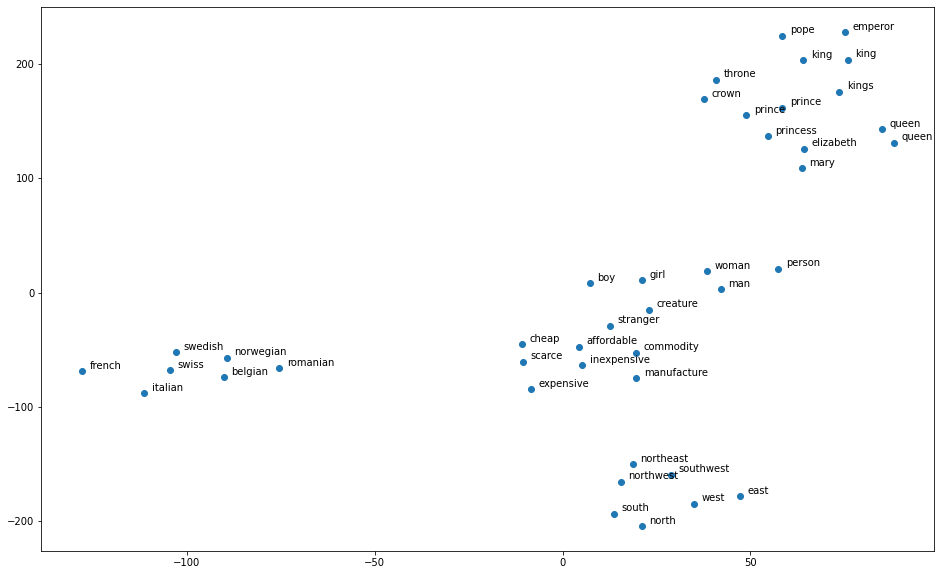

In [17]:
#plot to see clustering
search_list = ['queen', 'king', 'man', 'cheap', 'west', 'italian']
plot_word_embeddings(w2v_pretrained, search_list)

#### Find interesting relationships between words: A is to B as C is to ? 
(Take a look into the lecture slides if you don't know)

B - A + C

In [12]:
B = 'king'
A = 'man'
C = 'woman'

w2v_pretrained.wv.most_similar(positive=[B, C], negative=[A])

[('empress', 0.6569164395332336),
 ('queen', 0.6493132710456848),
 ('prince', 0.6315504908561707),
 ('son', 0.6280880570411682),
 ('throne', 0.6242474913597107),
 ('elizabeth', 0.6212048530578613),
 ('princess', 0.6134656071662903),
 ('emperor', 0.6060546636581421),
 ('regent', 0.6041452288627625),
 ('constantine', 0.6026308536529541)]

In [13]:
B = 'brother'
A = 'man'
C = 'woman'

w2v_pretrained.wv.most_similar(positive=[B, C], negative=[A])

[('wife', 0.8150659203529358),
 ('sister', 0.8015735745429993),
 ('daughter', 0.7925188541412354),
 ('mother', 0.7503595948219299),
 ('widow', 0.7458272576332092),
 ('son', 0.7380955219268799),
 ('cousin', 0.733224093914032),
 ('husband', 0.7251664996147156),
 ('aunt', 0.7236525416374207),
 ('grandmother', 0.7160243988037109)]

In [ ]:
# TODO: Given a word 'w' and a list of words, find the word in the list that is most similar to 'w' 

def most_similar_to_given(w, word_list):
    return

In [ ]:
# TODO: Find the most similar word to apple in the list
word = 'apple'
candidates = ['fruit', 'chair', 'mountain', 'freedom']
print(most_similar_to_given(word, candidates))

In [ ]:
# TODO: Try again. 
word = 'apple'
candidates = ['fruit', 'chair', 'computer', 'freedom']
print(most_similar_to_given(word, candidates))

#### Q: What is an issue that the two examples reveal?

##### Answer: *Give your answer here*

We can also naively compare sentences by adding up all word embeddings of the respective sentences and diving by the length

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from copy import deepcopy

#TODO: Generalize the similarity function to be able to compare sentences using cosine-similarity

def sentence_similarity(embeddings, sentence1, sentence2):
    return

In [ ]:
print(sentence_similarity(w2v_pretrained.wv, 'apple is more tasty than orange', 'fruit'))
print(sentence_similarity(w2v_pretrained.wv, 'apple is more tasty than orange', 'computer'))

#### Q: The similarity changes but is still close to the other. Why is that?

#### A: Give your answer here

## Train Word2Vec and FastText models using Gensim

Now it is time to train our own word-embeddings. We will use the DSTC2 data to train our models. This data set consists of dialogues where a customer tries to find information about restaurants.

In [ ]:
# read data
import json

with open("dstc2_utterances", 'rb') as data_file:
    pre_data = json.load(data_file)

data = []
for sentence in pre_data:
    data.append(sentence.lower().split(' '))
    

In [ ]:
from gensim.models import Word2Vec
# Train your model using the Word2Vec class, change number of epochs and vector-size if necessary
# To check whether your embeddings are useful, perform the sanity check in the next line
trained_w2v = Word2Vec(data, vector_size=1, window=5, min_count=1, epochs=1)

In [ ]:
# Sanity check if trained word-embeddings capture similarity. 
# South, east, centre and north should be similar to west
# cheap, expensive should be similar to moderate
print(trained_w2v.wv.most_similar('west'))
print(trained_w2v.wv.most_similar('moderate'))

In [ ]:
#plot to see clustering
search_list = ['cheap', 'west', 'italian']
plot_word_embeddings(trained_w2v, search_list)

#### Q: You should be able to identify three clusters. If you have a neural network that needs to make predictions on these words, can you think of an advantage for prediction that these learned embeddings with its clusters bring?

#### A: Give your answer here

#### A big issue of Word2Vec is the fixed vocabulary size, an alternative solution is provided by FastText

In [ ]:
# not in the vocabulary
try:
    trained_w2v.most_similar('inexpensive')
except:
    print("Error: This word is not in the vocabulary!")

In [ ]:
from gensim.models.fasttext import FastText
#Train your FastText model using the FastText method
trained_ft = FastText(vector_size=1, window=5, min_count=1, sentences=data, epochs=1)

In [ ]:
#Sanity check if trained word-embeddings capture similarities as before
print(trained_ft.wv.most_similar('west'))
print(trained_ft.wv.most_similar('moderate'))

In [ ]:
search_list = ['cheap', 'west', 'italian']
plot_word_embeddings(trained_ft, search_list)

In [ ]:
#FastText lets us do comparisons for words outside of the vocabulary in contrast to Word2Vec
trained_ft.wv.most_similar('inexpensive')

#### Q: If you look at the last print, what might be problematic for a classifier that needs to detect the user preferences (as food-type, location, etc.) 

##### Answer: *Give your answer here*


## Train your own Word2Vec model

The last exercise is to implement the simplest version of the SkipGram Word2Vec model and train it using the DSTC data that we already used to train a Word2Vec model with gensim.

In order to do that, we need to perform the following steps:

1. We need to create a vocabulary dictionary that maps every word in the data to an index.
2. We need to create the data set for the Word2Vec model: The data set consists of pairs (x,y), where x is a word in a sentence and y is a word in the context of x. y is in the context of x if and only if y is in the window of x, where the size of the window is a hyperparameter (set to 5 in the code). x is not in the context of itself. As an example: "i need something in the expensive price range" with window-size of 2: --> (i, need), (i, something), (need, i), (need, something), (need, in), ...
3. Build the model: The model has a learnable embedding matrix U of size (vocabulary_size, embedding_dim) and another learnable matrix W of size (embedding_dim, vocabulary_size). The goal of the model is to maximise the log-likelihood of y given x, for all pairs (x, y) in the data. To do that, you should preprocess the data so that the pairs (x, y) are the indices of the words and not the string representation. The model then maps the index of x to the corresponding row of the embedding matrix U, yielding a vector v of size embedding_dim. We then do a matrix multiplication (i.e. a linear layer without bias) v*W to output a vector of size vocabulary_size. Afterwards, we apply a softmax-function to obtain a probability distribution over the vocabulary. We then need to maximise the probability of y.

Comments: Feel free to use the library of your choice (tensorflow, keras, pytorch..). You can use existing methods like embedding-layers or linear layers to build your model.

You can find illustrations of the data set creation and model architecture below (taken from http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/)

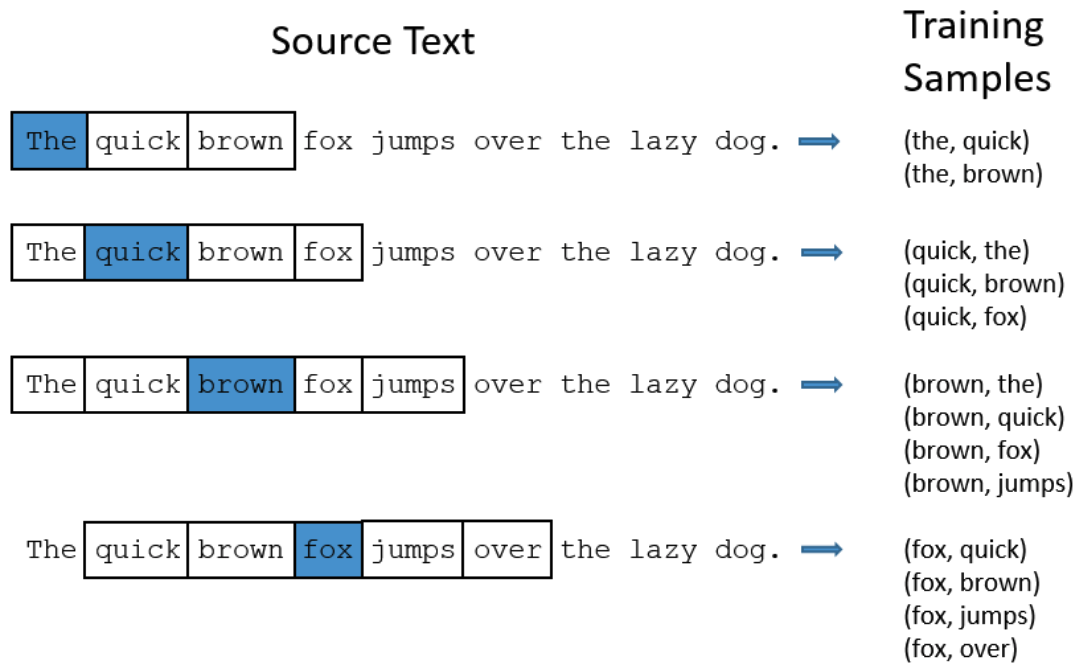

In [1]:
from IPython.display import Image
Image("data_creation.png")

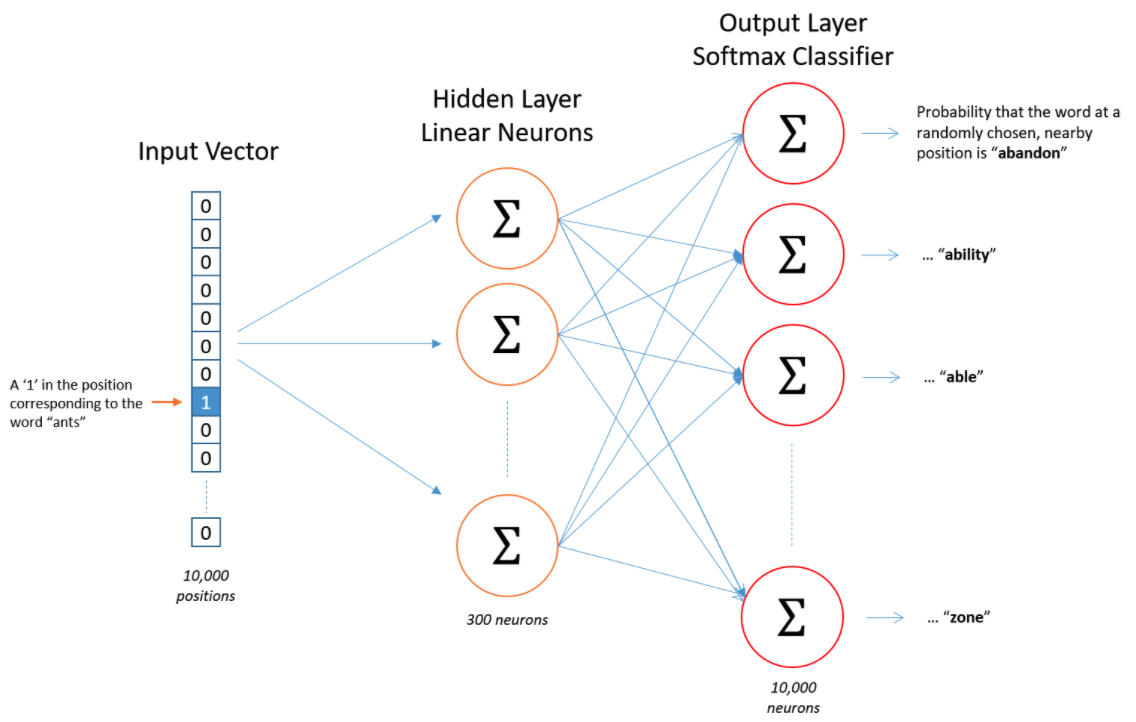

In [2]:
Image("word2vec_model.png")

In [1]:
# Import packages if you need more
#!pip install torch     #this would for instance install torch in your virtual environment
from torch import nn
import torch.optim as optim
import numpy as np
import torch

#### Step 1

In [ ]:
# TODO: create two dictionaries word2idx and idx2word that gives each word an index

tokenized_corpus = data

#### Step 2

In [2]:
# create the data set here, consisting of pairs (word, context-word)

window_size = 5    # the size of the context window
idx_pairs = []     # this will be the data set, containing pairs (word, context-word)

#TODO: Fill your data set idx_pairs here, it should be a np-array

#### Step 3

In [ ]:
# Build the model here, use the libraries of your choice, such as torch, tensorflow, keras 
# and methods such as embedding layers or linear layers, etc.

class SkipGram():
    #TODO: Add your word2vec model here

In [ ]:
num_epochs = 100
embedding_dim = 100
learning_rate = 0.003
batch_size = 128

model = SkipGram(vocabulary_size, embedding_dim)

for epoch in range(num_epochs):
    
    training_indices = np.arange(idx_pairs.shape[0])
    np.random.shuffle(training_indices)
    
    X_train = idx_pairs[training_indices][:, 0]
    Y_train = idx_pairs[training_indices][:, 1]
    
    n_batches = X_train.shape[0]//batch_size
    total_loss = 0
    for i in range(n_batches):
        
        X_batch = X_train[i * batch_size: (i+1) * batch_size]
        Y_batch = Y_train[i * batch_size: (i+1) * batch_size]
        
        #TODO: Add optimisation here
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, total loss:", total_loss / n_batches)
        


After the training has finished, we want to see whether the created embeddings make sense to us. In order to do that, write a function that takes a word from the vocabulary as input and outputs the n most similar words, where similarity is measured by taking the learned word-embeddings and computing cosine-similarity.

In [ ]:
def find_most_similar(word, num_similar=3):
    return

In [ ]:
find_most_similar("cheap")

In [ ]:
find_most_similar("south")

In [ ]:
find_most_similar("indian")